- Liam Tessendorf - 20-701-348
- Maximilian von Willich - 17-944-349

In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import scipy as sp
import os

In [4]:
gml_files = [f for f in os.listdir("Archive_1/data/") if f.endswith(".gml")]

graphs = [nx.read_gml(os.path.join("Archive_1/data/", path)) for path in gml_files]

## 1.

Plot a scatter plot with the average degree of the nearest neighbours $knn(k)$ against the degree.

In [ ]:
annd_graphs = [nx.average_neighbor_degree(g) for g in graphs]
degrees_graphs = [dict(g.degree()) for g in graphs]

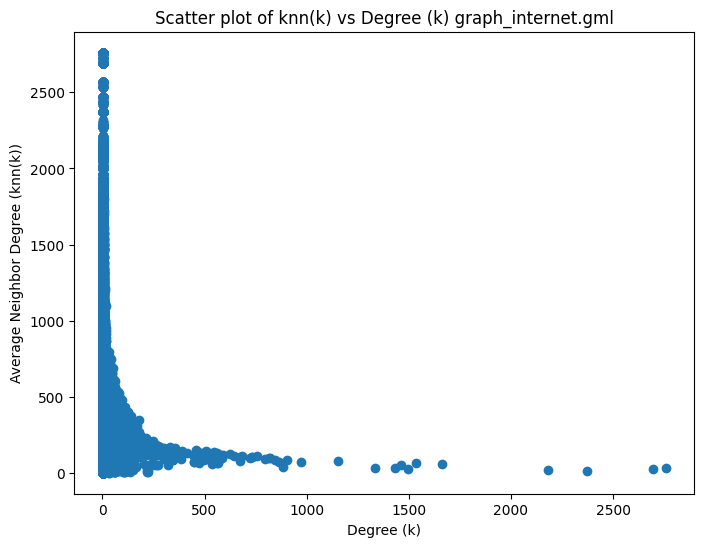

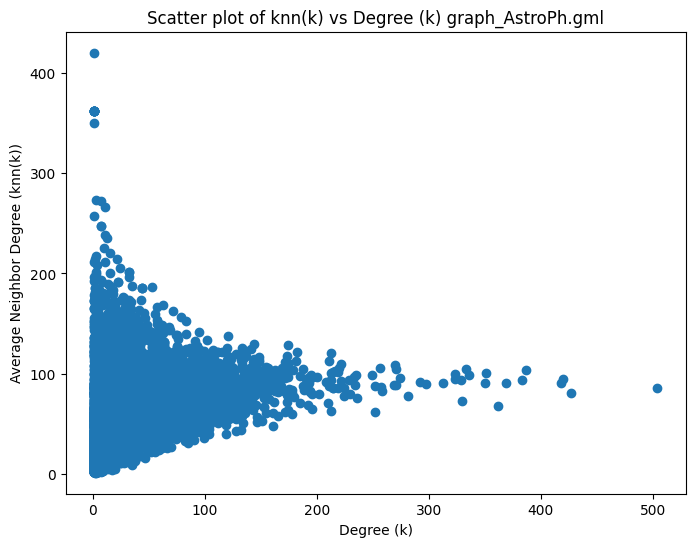

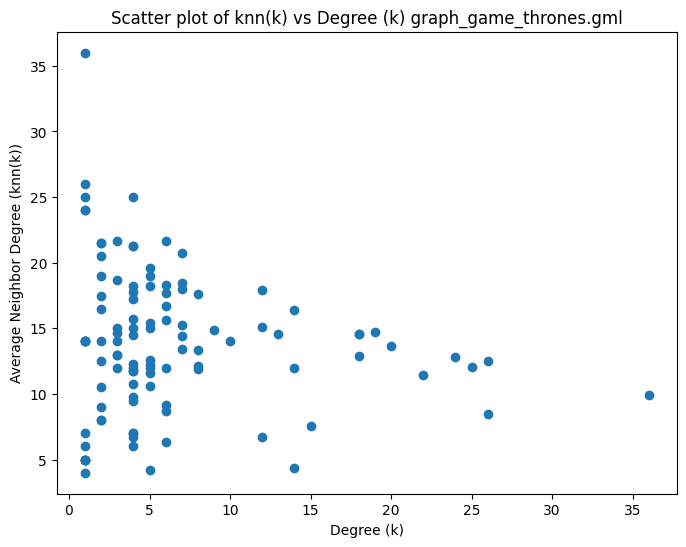

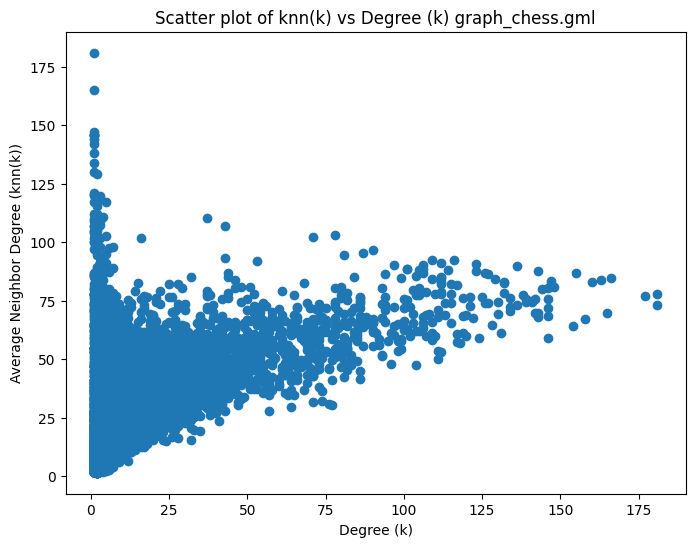

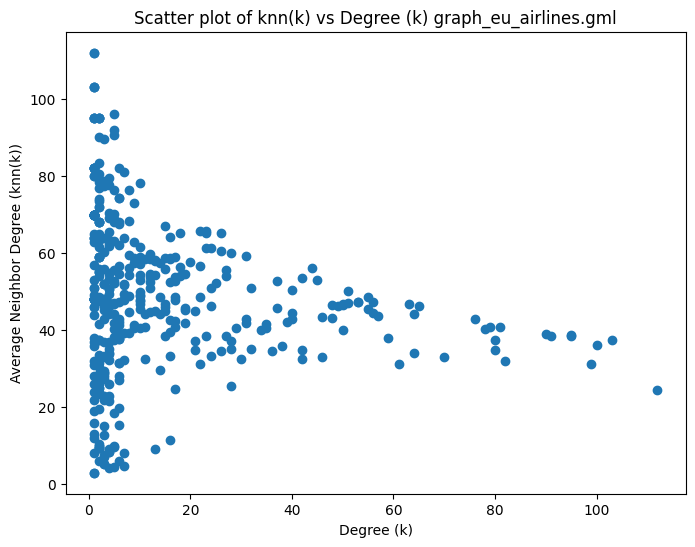

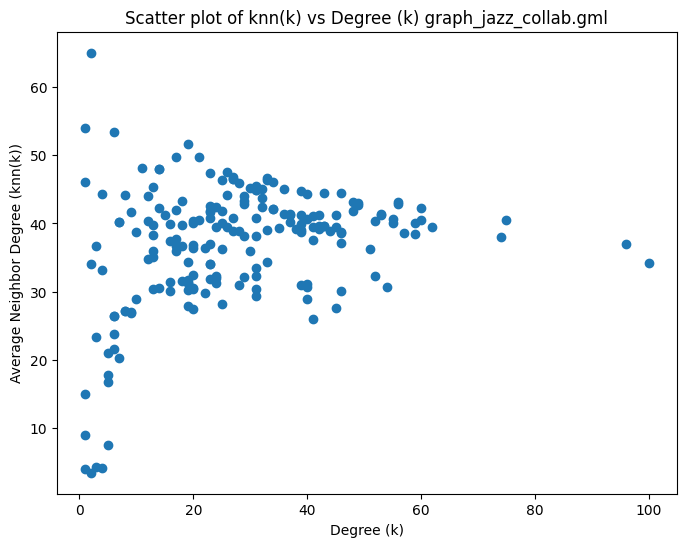

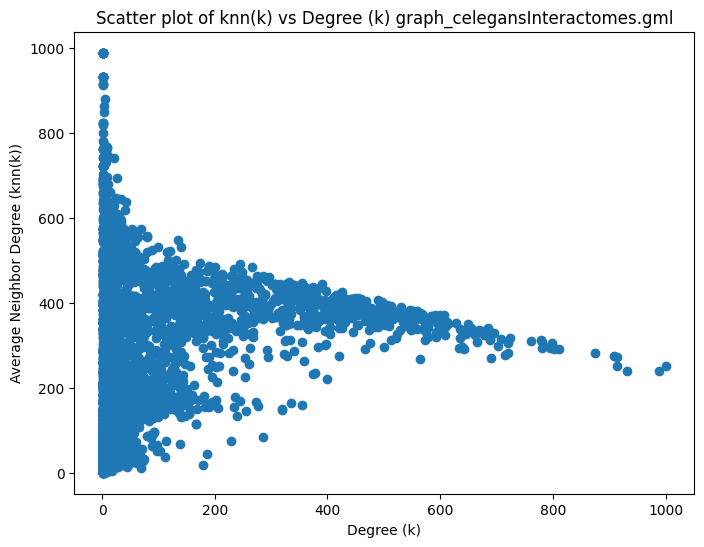

In [ ]:
def plot_knn_against_k(graphs: list, degrees: list, annd: list):
    for i, g in enumerate(graphs):
        x, y = zip(*[(degrees[i][n], annd[i][n]) for n in g.nodes()])
        plt.figure(figsize=(8, 6))
        plt.scatter(x, y)
        plt.xlabel("Degree (k)")
        plt.ylabel("Average Neighbor Degree (knn(k))")
        plt.title(f"Scatter plot of knn(k) vs Degree (k) {gml_files[i]}")
        plt.show

plot_knn_against_k(graphs, degrees_graphs, annd_graphs)

## 2.

Plot the same scatter plot from question 1 but using a randomised version of the network. Plot
the distribution in the same figure together with the scatter plot you obtained in question 1.

*Hint: The randomised networks are obtained via multiple edge swaps via the networkx function:
nx.algorithms.smallworld.random_reference. Make sure to set the parameter connectivity =
False to have faster execution.*

In [ ]:
graphs_random = [nx.algorithms.smallworld.random_reference(g, connectivity=False) for g in graphs]
annd_graphs_random = [nx.average_neighbor_degree(g) for g in graphs_random]
degrees_graphs_random = [dict(g.degree()) for g in graphs_random]

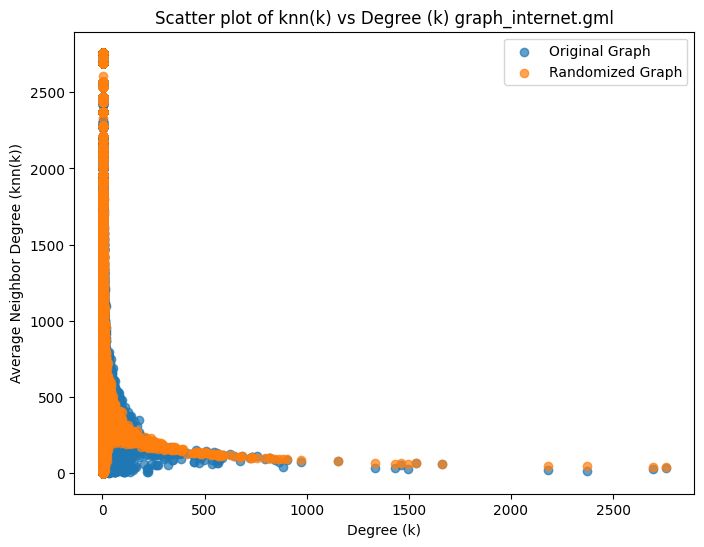

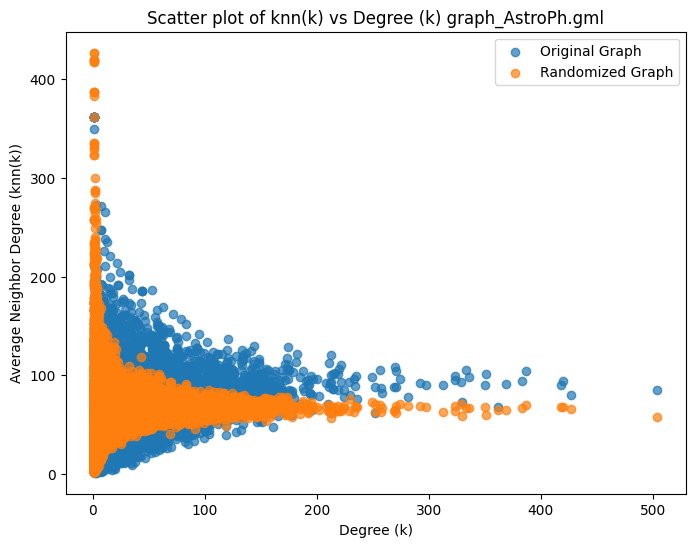

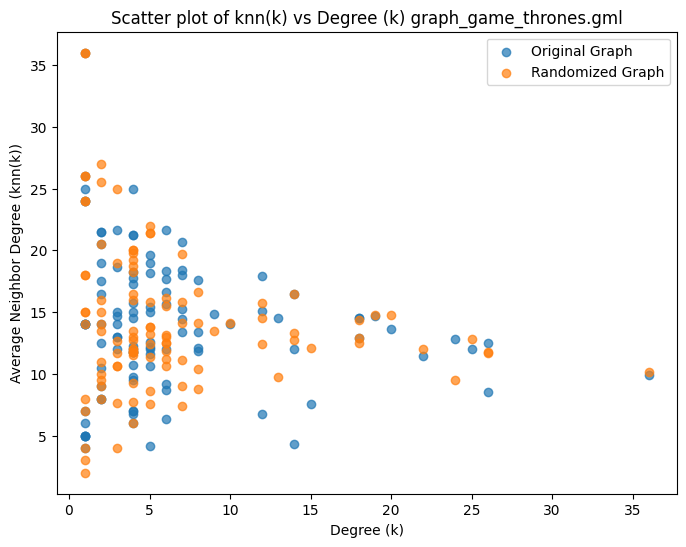

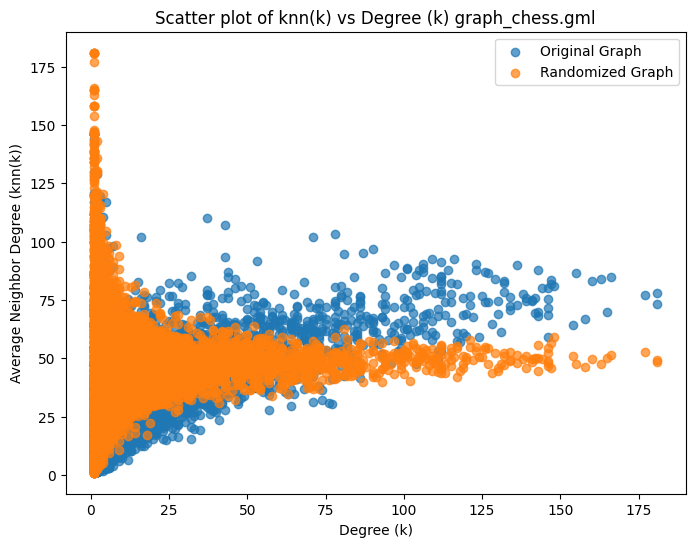

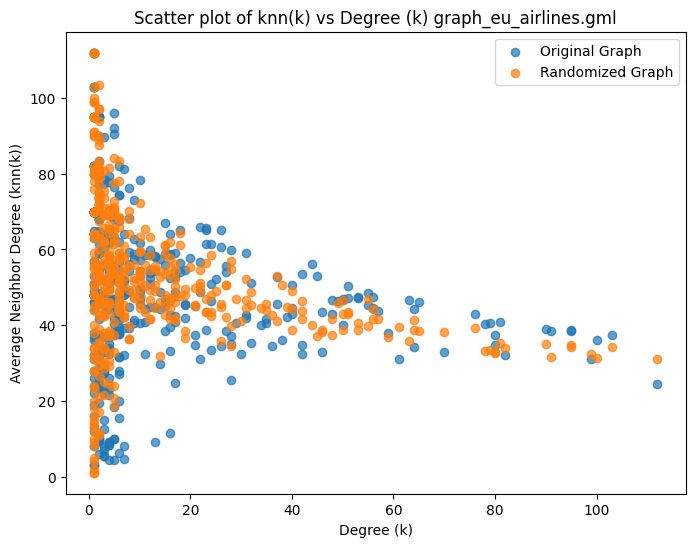

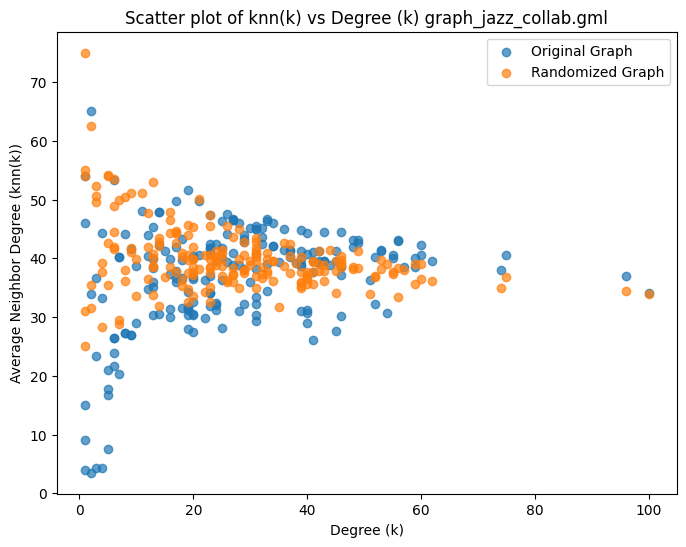

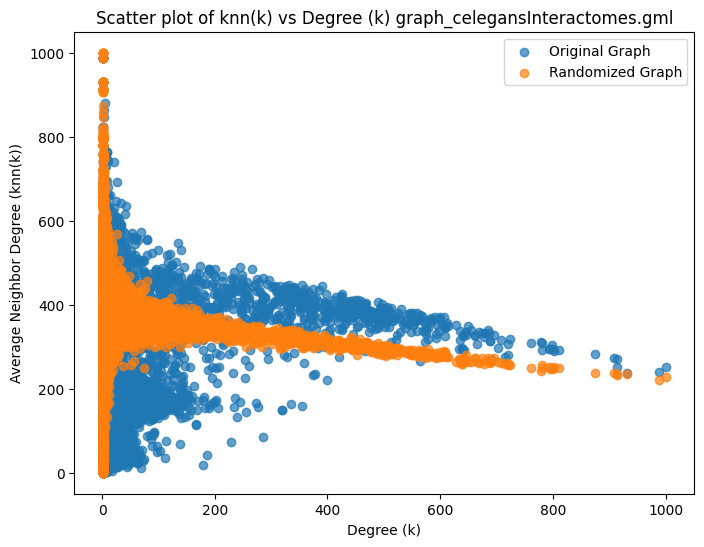

In [ ]:
def plot_knn_against_k_with_random(graphs: list):
    for i, _ in enumerate(graphs):
        x, y = zip(
            *[(degrees_graphs[i][n], annd_graphs[i][n]) for n in graphs[i].nodes()]
        )

        x_rand, y_rand = zip(
            *[
                (degrees_graphs_random[i][n], annd_graphs_random[i][n])
                for n in graphs_random[i].nodes()
            ]
        )

        plt.figure(figsize=(8, 6))
        plt.scatter(x, y, label="Original Graph", alpha=0.7)
        plt.scatter(x_rand, y_rand, label="Randomized Graph", alpha=0.7)
        plt.xlabel("Degree (k)")
        plt.ylabel("Average Neighbor Degree (knn(k))")
        plt.title(f"Scatter plot of knn(k) vs Degree (k) {gml_files[i]}")
        plt.legend()
        plt.show


plot_knn_against_k_with_random(graphs)

# 3.
Compute the assortativity coefficient of the real network and the randomized network. Put the computed assortativity values in the plot labels of the figure you created in question 2.

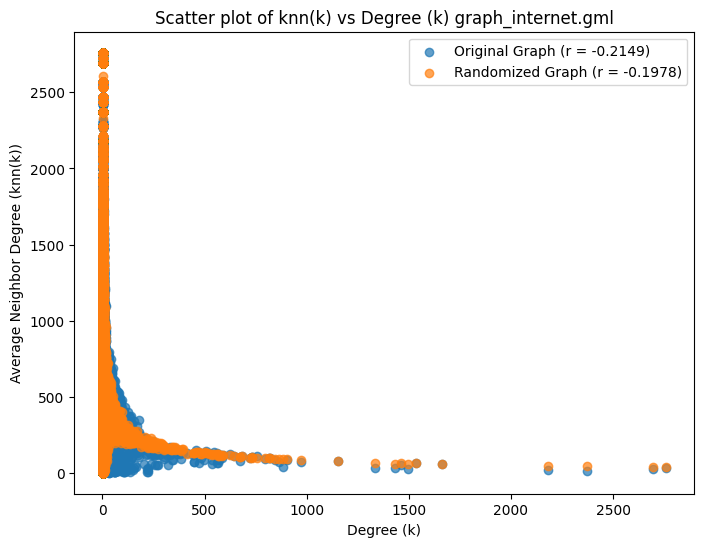

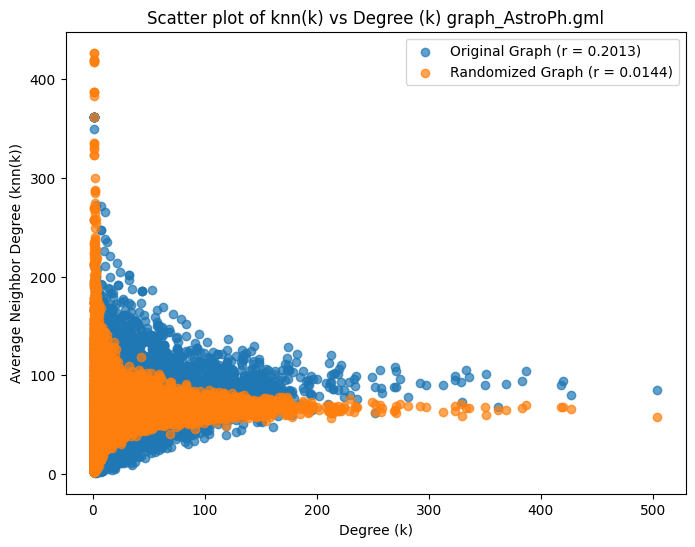

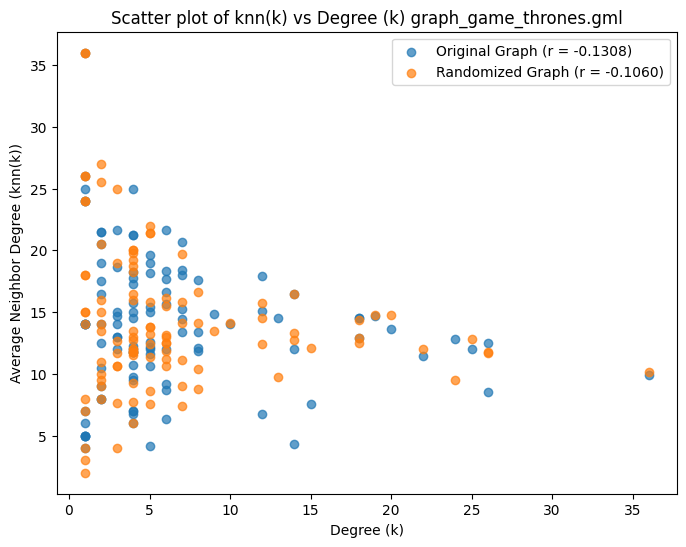

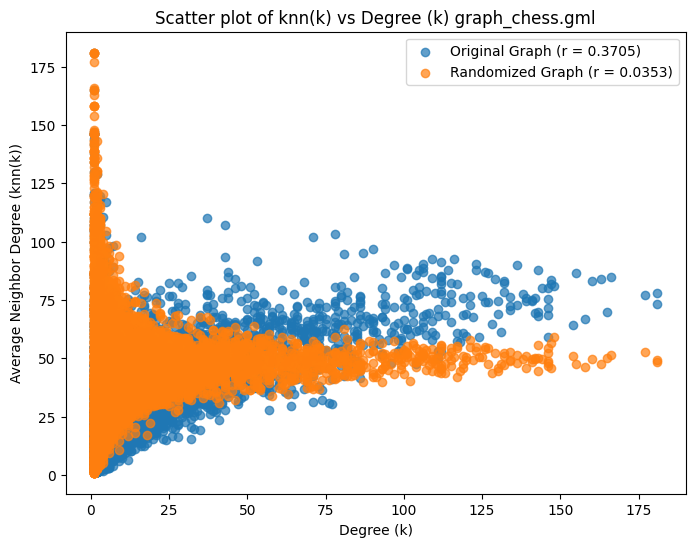

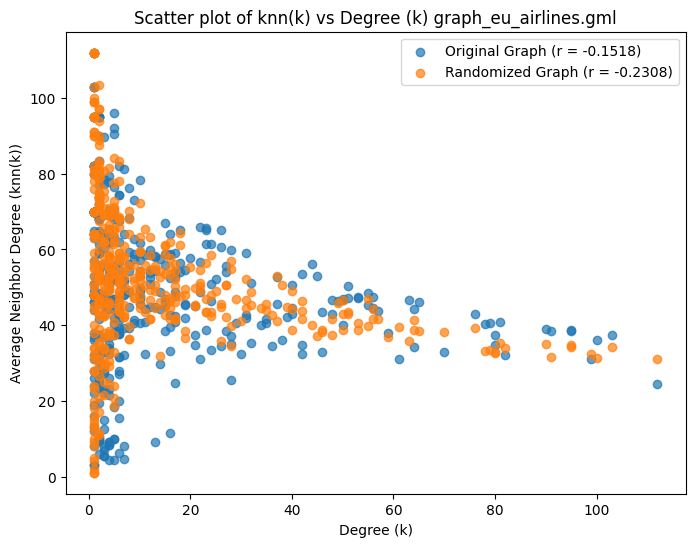

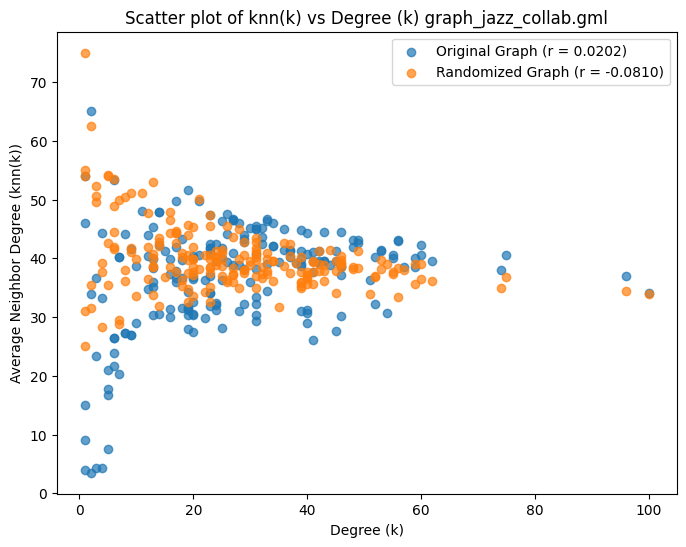

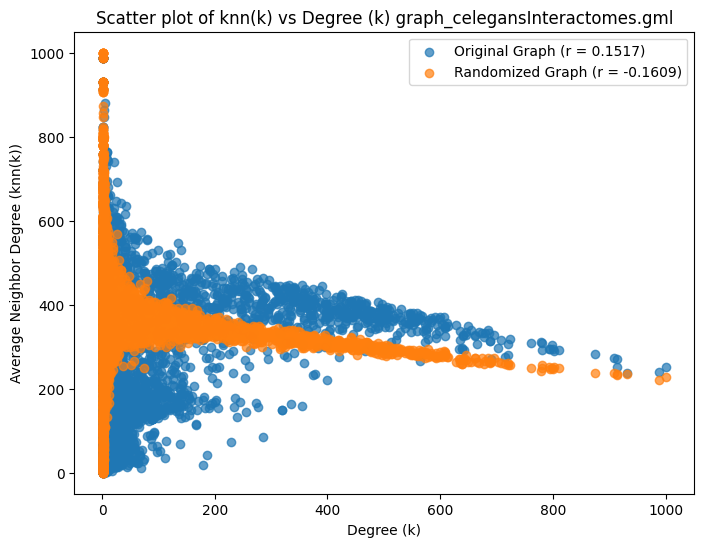

In [ ]:
def plot_knn_against_k_with_assortativity(graphs: list):
    for i, _ in enumerate(graphs):
        x, y = zip(
            *[(degrees_graphs[i][n], annd_graphs[i][n]) for n in graphs[i].nodes()]
        )

        x_rand, y_rand = zip(
            *[
                (degrees_graphs_random[i][n], annd_graphs_random[i][n])
                for n in graphs_random[i].nodes()
            ]
        )

        assortativity_original = nx.degree_assortativity_coefficient(graphs[i])
        assortativity_random = nx.degree_assortativity_coefficient(graphs_random[i])

        plt.figure(figsize=(8, 6))
        plt.scatter(
            x, y, label=f"Original Graph (r = {assortativity_original:.4f})", alpha=0.7
        )
        plt.scatter(
            x_rand,
            y_rand,
            label=f"Randomized Graph (r = {assortativity_random:.4f})",
            alpha=0.7,
        )
        plt.xlabel("Degree (k)")
        plt.ylabel("Average Neighbor Degree (knn(k))")
        plt.title(f"Scatter plot of knn(k) vs Degree (k) {gml_files[i]}")
        plt.legend()
        plt.show()


plot_knn_against_k_with_assortativity(graphs)

# 4.

Plot the probability density of degree values p(k) = P(ki = k) ∈ [0, 1] ∀i ∈ V . Use a logarithmic binning and adjust the axis scales accordingly.

*Hint: look into plt.hist() documentation*

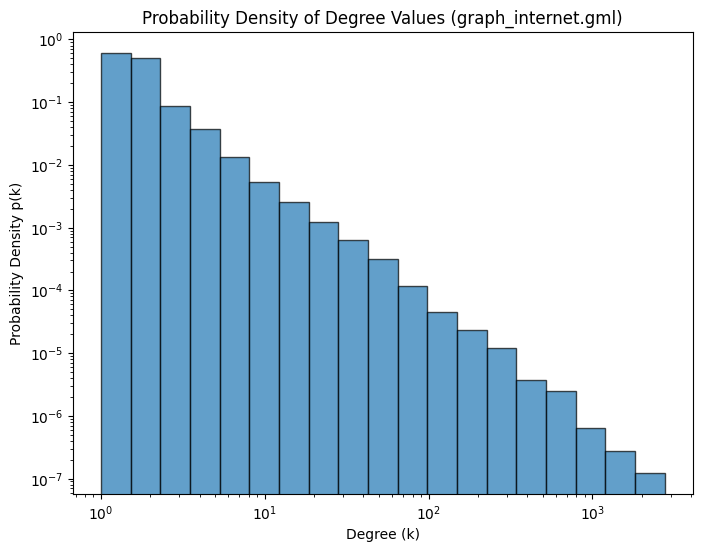

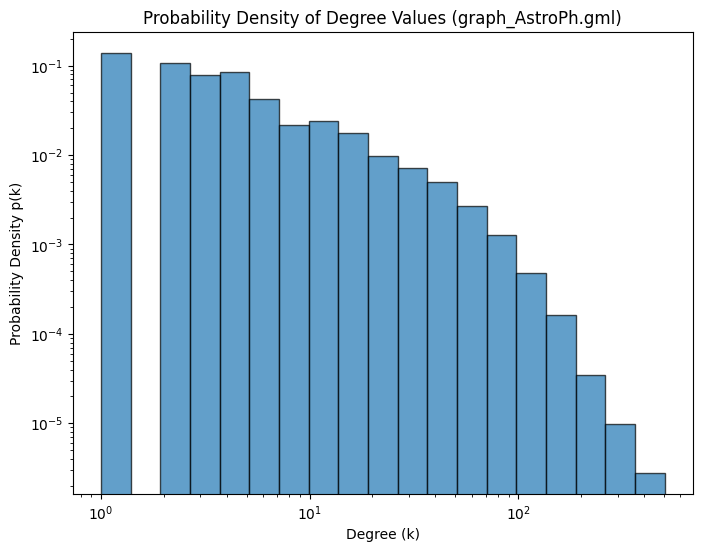

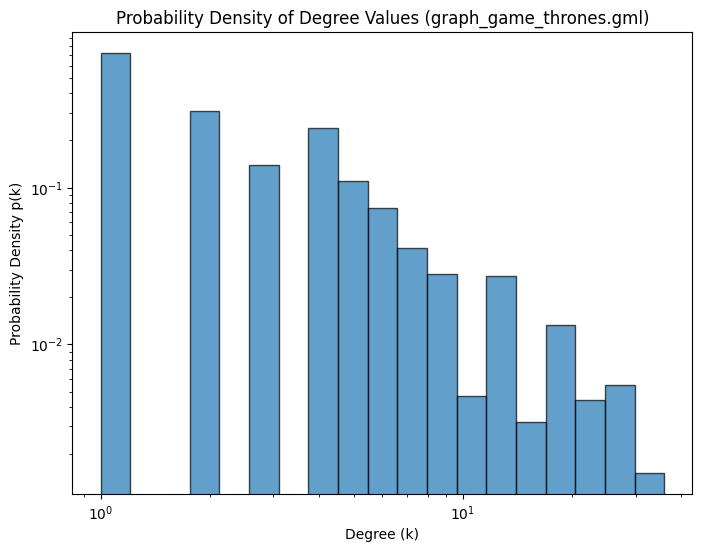

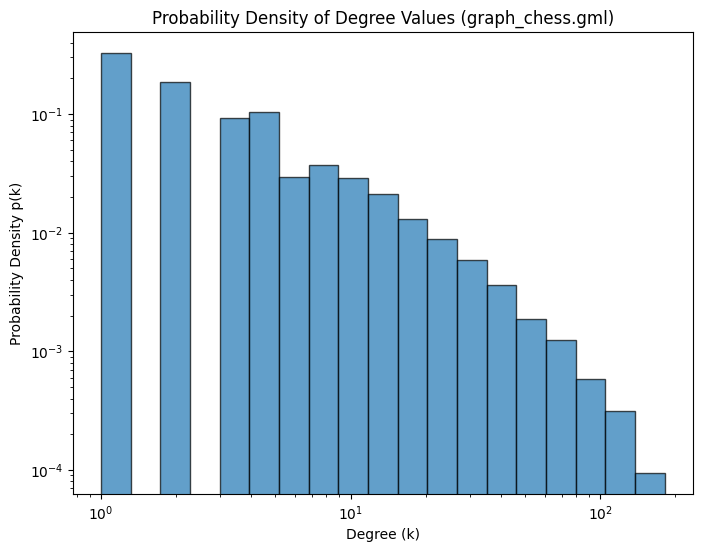

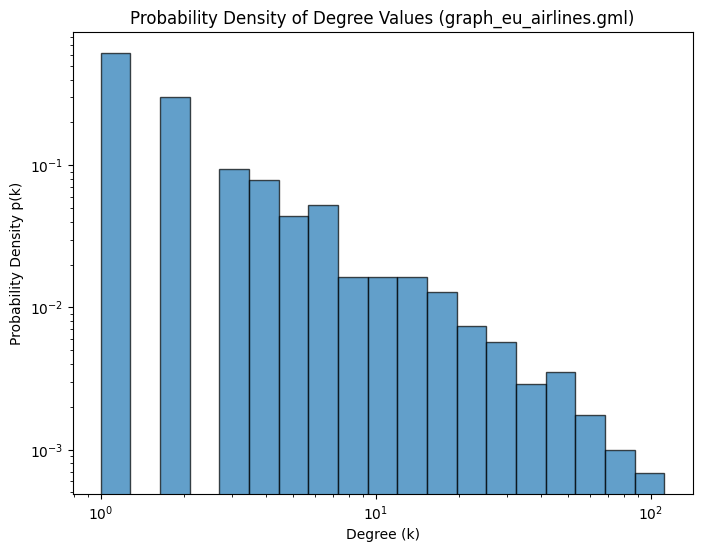

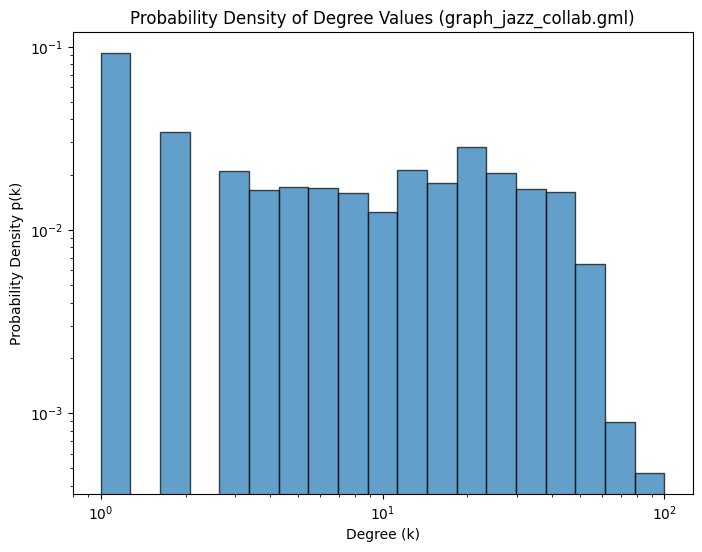

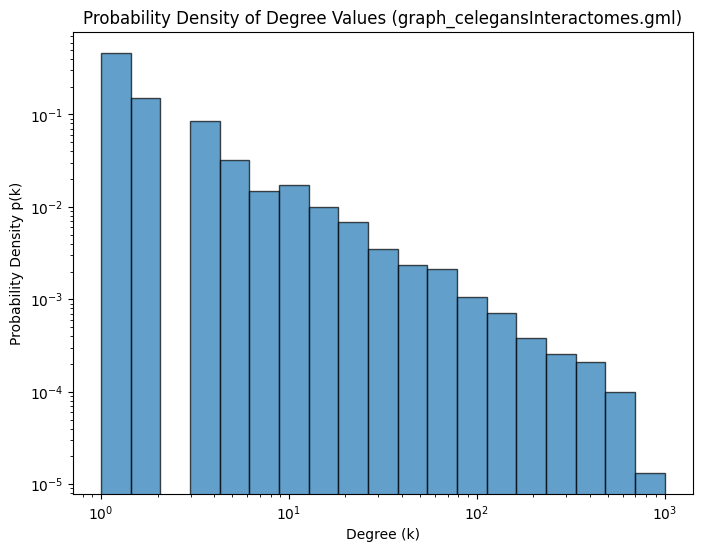

In [ ]:
def plot_degree_distribution(graphs):
    for i, g in enumerate(graphs):
        degrees = [degree for node, degree in g.degree()]
        degrees = [d for d in degrees if d > 0]

        min_degree = min(degrees)
        max_degree = max(degrees)

        bins = np.logspace(np.log10(min_degree), np.log10(max_degree), num=20)

        plt.figure(figsize=(8, 6))
        plt.hist(degrees, bins=bins, density=True, edgecolor="black", alpha=0.7)

        plt.xscale("log")
        plt.yscale("log")

        plt.xlabel("Degree (k)")
        plt.ylabel("Probability Density p(k)")
        plt.title(f"Probability Density of Degree Values ({gml_files[i]})")
        plt.show()


plot_degree_distribution(graphs)

# 5.
For each network, provide a short comment on the plots you produced in the previous 4 questions. Decide whether a Network is assortative or disassortative. Explain your rationale.

Based on the plots from exercise 3, we see the assortativity value and the value of the respective randomised graph. On one hand assortativity can be assessed by the value alone, to gain insight into how similar the node degree per neighbors are. To use insight into assortativity as higher order property, this value needs to be compared to the one of the randomised graph. A higher score than the randomized graph indicates organized similiarity, whereas a lower score indicates organized dissimilarity. The score of randomized graphs is determined by the degree distribution (exercise 4) plus noise. For example in the plot of degree distribution from the graph_internet.gml, we observe that it follows a broad distribution with a power-law decay. This kind of degree distribution is typical of disassortative networks, where high-degree nodes tend to be connected to low-degree nodes. This corresponds to the assortativity score of r = -0.21 for the internet graph, which is close to the randomized value of r = -0.2, indicating that the structure is largely driven by the degree distribution rather than any organized similarity or dissimilarity beyond randomness.

  > * AstropPh is assertative with r = 0.2, much higher than the randomized r = 0.02 and shows organized assertativeness.
  > * jazz_colab has a neutral score of r = 0.02 which is higher than randomized r = -0.1, and thus shows organized similiarity.
  > * internet has a disassorative r = -0.21, though this is quite similar to the randomized r = -0.2, therefore not displaying an organized assorativeness.
  > * game_thrones shows a similar pattern to internet with r = -0.13 and randomized r = -0.16
  > * eu_airlines also has a similar pattern, though a slight organised similiarity could be assumed with r = -0.15 and randomized r = -0.2
  > * celegansInteractomes shows clear assortativity and organised similarity with r = 0.15 and randomized r = -0.16
  > * The same goes for chess with r = 0.37 and randomized r = 0.0

# 6.

Find a dataset representing a disassortative or assortative network. Provide a clear description of the network’s origin and nature, and explain why your network would exhibit assortative/disassortative behavior (Support your claim by repeating the task you performed for question 1‑5).

In [ ]:
import csv

# Create two new .gml files

# Create a directed graph
G = nx.DiGraph()

# Add nodes with attributes
with open("more_data/fb-pages-tvshow.nodes", "r") as f:
    next(f)  # Skip the header
    for line in f:
        # Split at the first and last comma
        first_comma = line.find(',')
        last_comma = line.rfind(',')

        node_id = line[:first_comma].strip()
        name = line[first_comma + 1:last_comma].strip().strip('"')  # Remove surrounding quotes if any
        new_id = line[last_comma + 1:].strip()

        # Add node with its attributes
        G.add_node(new_id, id=node_id, name=name)


# Add edges
with open("more_data/fb-pages-tvshow.edges", "r") as f:
    for line in f:
        source, target = line.strip().split(',')
        G.add_edge(source, target)

# Save the graph as .gml
nx.write_gml(G, "more_data/fb-pages-tvshow.gml")



# Create a directed graph
G = nx.DiGraph()

# Add edges
with open("more_data/rec-epinions-user-ratings.edges", "r") as f:
    for line in f:
        if not line.startswith('%'):  # Skip comment lines
            source, target, *_ = line.strip().split()
            G.add_edge(source, target)

# Save the graph as .gml
nx.write_gml(G, "more_data/epinions.gml")


In [ ]:
# Read in two more files
more_gml_files = [f for f in os.listdir("more_data/") if f.endswith(".gml")]

# Directly transforms graphs into undirected form, so that later randomization properly works
more_graphs = [nx.read_gml(os.path.join("more_data/", path)).to_undirected() for path in more_gml_files]


In [ ]:
# Overwriting previous variables (adapting function parameters would have been more elegant)
gml_files = more_gml_files
graphs = more_graphs
annd_graphs = [nx.average_neighbor_degree(g) for g in more_graphs]
degrees_graphs = [dict(g.degree()) for g in more_graphs]

graphs_random = [nx.algorithms.smallworld.random_reference(g, connectivity=False) for g in more_graphs]
annd_graphs_random = [nx.average_neighbor_degree(g) for g in graphs_random]
degrees_graphs_random = [dict(g.degree()) for g in graphs_random]

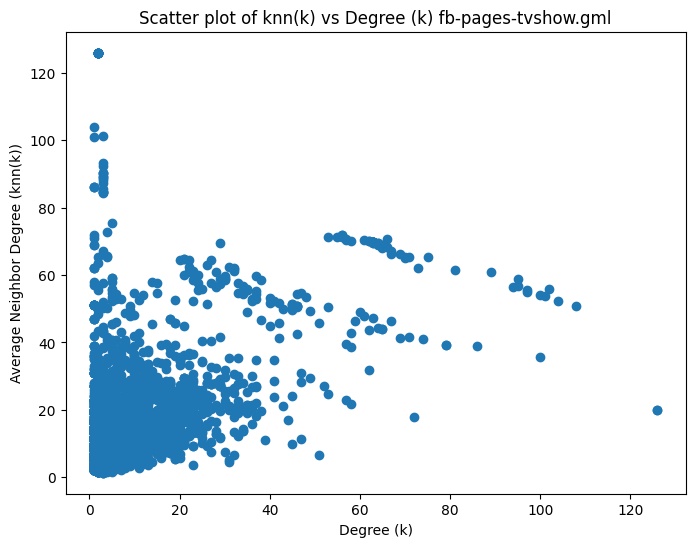

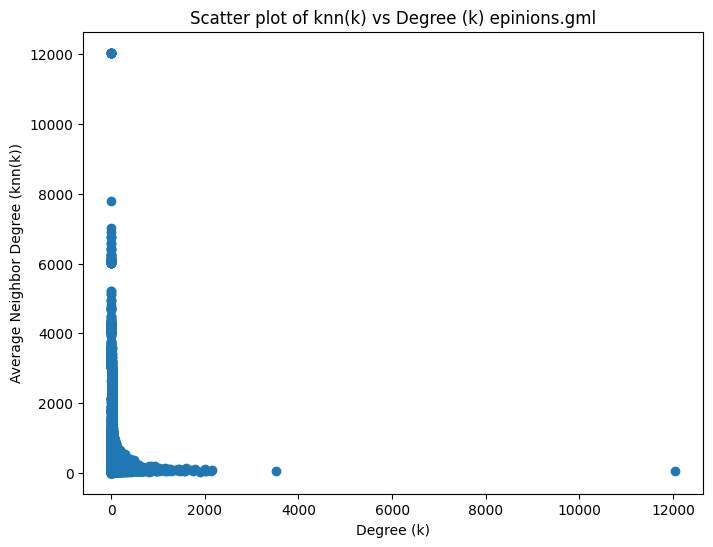

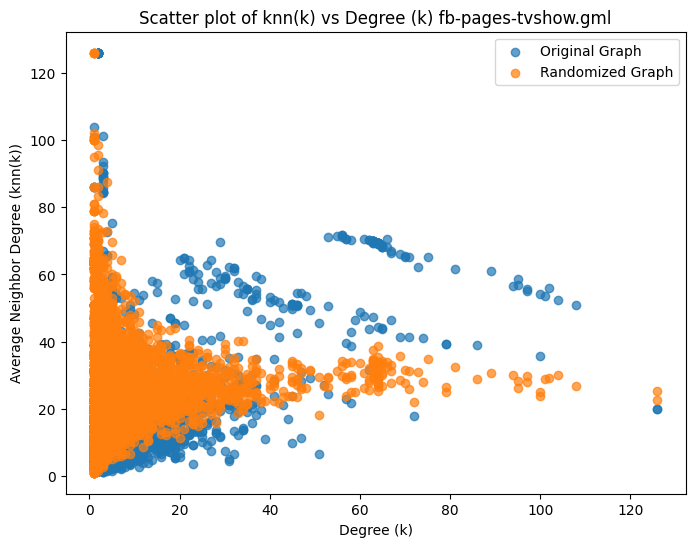

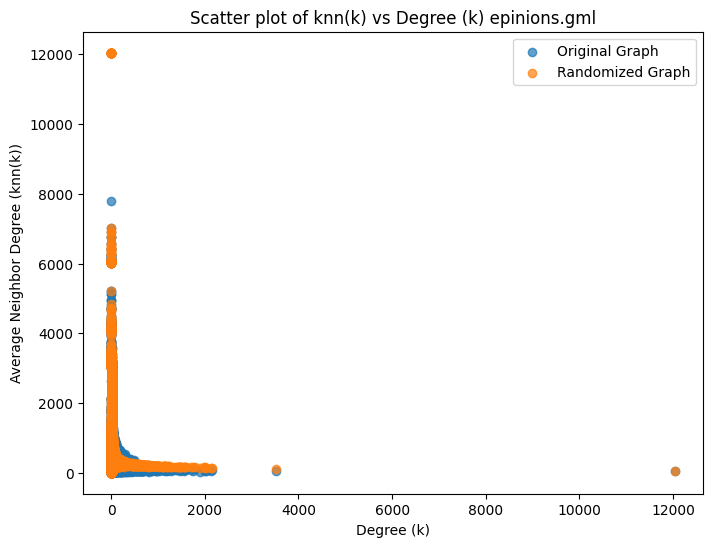

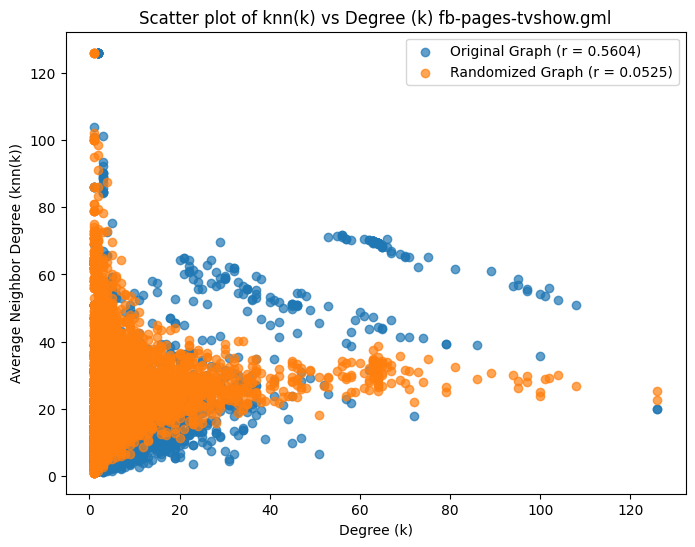

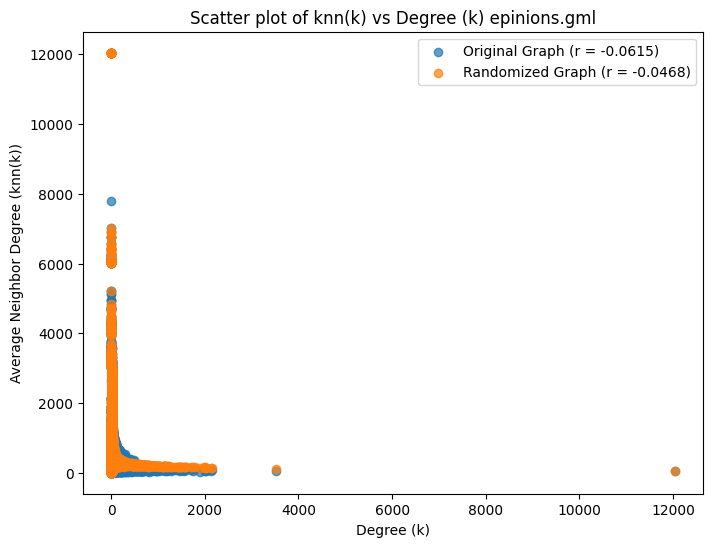

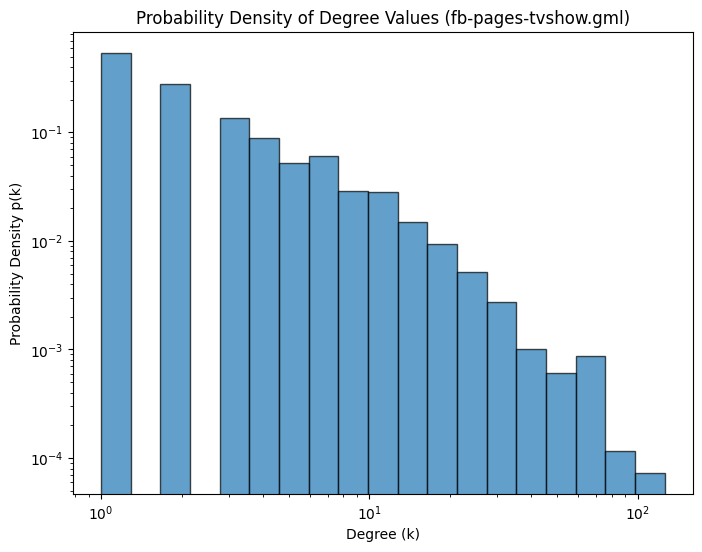

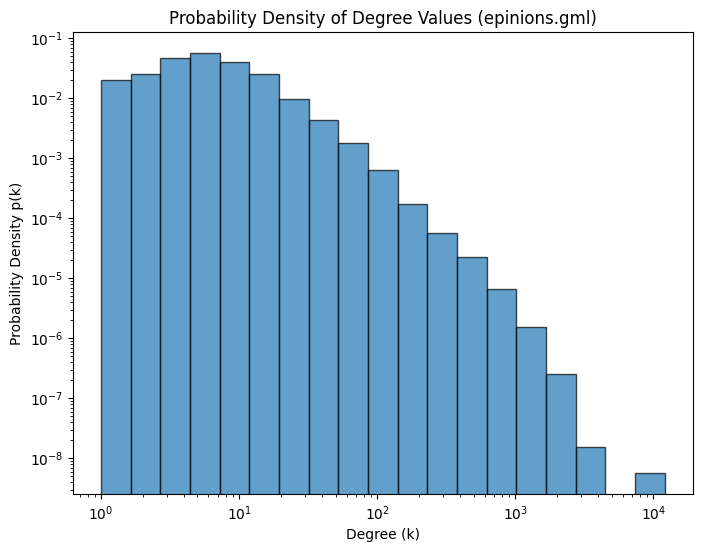

In [ ]:
# 1
plot_knn_against_k(more_graphs, degrees_graphs, annd_graphs)

# 2
plot_knn_against_k_with_random(more_graphs)

# 3
plot_knn_against_k_with_assortativity(more_graphs)

# 4
plot_degree_distribution(more_graphs)

### Nature of Networks
We chose to find two networks, one with high assertivity, one with disassertativity.

The facebook page tv shows network is based on which tv pages on facebook like which other pages. The nodes are pages on facebook related to TV shows. The edges are likes of other pages.

The epinion network describes users trust in each other. Nodes being users and edges being trust.

Both datasets are based on the following source: Rossi, R. A., & Ahmed, N. K. (2015). *The Network Data Repository with Interactive Graph Analytics and Visualization*. In AAAI. [Link](https://networkrepository.com).


As there is a problem with randomizing directed graphs, we made the graphs undirected. This could strongly change the nature of the graph, only encompassing where connections exist, no longer distinguishing who actively takes part in the relation and who doesn't. These two new graphs still seem interesting and insightful, though need to be interpreted more carefully.

### Assertativity and Exercise 5
The TV shows are expected to have strong assertativity, since pages around smaller shows are related to other pages of the same show, sharing similiar connectivity.
This is supported by r = 0.56 whereas the randomized r = 0.05.

In contrast the epinions trust relations shows clear disassertativity with r = -0.06 in contrast to randomized r = -0.04.
In the directed graph version the disassertativity is far greater with r = -0.55. This discrepancy shows the clearly different high order properties between a directed graph and its undirected version.

The TV show pages might be less affected by the removal of directionality, since the relations could be much more mutual between pages of a common show. In contrast in the epinion network many people trust few influencers and these relations are not at all mutual, so removing the directionality strongly changes the network's graph.
